In [1]:
import pandas as pd

# Load all Excel files
food_xls = pd.ExcelFile("cleaned_bulk_data_food.xlsx")
cross_xls = pd.ExcelFile("cleaned_bulk_data_cross_cutting.xlsx")
energy_xls = pd.ExcelFile("cleaned_bulk_data_energy.xlsx")
finance_xls = pd.ExcelFile("cleaned_bulk_data_finance.xlsx")

# Print sheet names
print("Food Indicators:", food_xls.sheet_names)
print("Cross-Cutting Indicators:", cross_xls.sheet_names)
print("Energy Indicators:", energy_xls.sheet_names)
print("Finance Indicators:", finance_xls.sheet_names)

# Preview first few rows of one sheet from each
food_df = food_xls.parse(food_xls.sheet_names[0])
cross_df = cross_xls.parse(cross_xls.sheet_names[0])
energy_df = energy_xls.parse(energy_xls.sheet_names[0])
finance_df = finance_xls.parse(finance_xls.sheet_names[0])

print("\n--- Food Sample ---\n", food_df.head())
print("\n--- Cross-Cutting Sample ---\n", cross_df.head())
print("\n--- Energy Sample ---\n", energy_df.head())
print("\n--- Finance Sample ---\n", finance_df.head())



Food Indicators: ['Country ID and group', 'Metadata', 'FAO Food Price Index', 'Commodity food prices', 'Fertilizer prices', 'Food price inflation']
Cross-Cutting Indicators: ['Country ID and group', 'Metadata', 'Global GDP Nowcast', 'Inflation rates', 'Central bank policy rates', 'Price of shipping']
Energy Indicators: ['Country ID and group', 'Metadata', 'Oil prices', 'Gas prices']
Finance Indicators: ['Country ID and group', 'Metadata', 'Reserve of developing countries', 'Evolution of intl. reserves', 'Bond yields of emerging markets', 'Bond spread of emerging markets']

--- Food Sample ---
   geography_code            countries developing_region_un development_status
0            AFG          Afghanistan     Asia and Oceania         Developing
1            ALB              Albania               Europe          Developed
2            DZA              Algeria               Africa         Developing
3            AGO               Angola               Africa         Developing
4        

In [2]:
# Rename columns in each dataset to avoid conflicts
food_df.rename(columns={
    'countries': 'food_countries',
    'development_status': 'food_development_status',
    'developing_region_un': 'food_developing_region_un'
}, inplace=True)

cross_df.rename(columns={
    'countries': 'cross_countries',
    'development_status': 'cross_development_status',
    'developing_region_un': 'cross_developing_region_un'
}, inplace=True)

energy_df.rename(columns={
    'countries': 'energy_countries',
    'development_status': 'energy_development_status',
    'developing_region_un': 'energy_developing_region_un'
}, inplace=True)

finance_df.rename(columns={
    'countries': 'finance_countries',
    'development_status': 'finance_development_status',
    'developing_region_un': 'finance_developing_region_un'
}, inplace=True)

# Now perform the merge
merged_df = food_df.merge(cross_df, on='geography_code', how='outer')
merged_df = merged_df.merge(energy_df, on='geography_code', how='outer')
merged_df = merged_df.merge(finance_df, on='geography_code', how='outer')

# Check the first few rows of the merged data
print(merged_df.head())


  geography_code              food_countries food_developing_region_un  \
0            AFG                 Afghanistan          Asia and Oceania   
1            AGO                      Angola                    Africa   
2            ALB                     Albania                    Europe   
3            ARE  United Arab Emirates (the)          Asia and Oceania   
4            ARG                   Argentina                   America   

  food_development_status             cross_countries  \
0              Developing                 Afghanistan   
1              Developing                      Angola   
2               Developed                     Albania   
3              Developing  United Arab Emirates (the)   
4              Developing                   Argentina   

  cross_developing_region_un cross_development_status  \
0           Asia and Oceania               Developing   
1                     Africa               Developing   
2                     Europe             

In [3]:
columns = [
    'food_development_status',
    'cross_development_status',
    'energy_development_status',
    'finance_development_status'
]

for col in columns:
    print(f"\n{col}:")
    print(merged_df[col].value_counts())



food_development_status:
food_development_status
Developing    141
Developed      47
Name: count, dtype: int64

cross_development_status:
cross_development_status
Developing    141
Developed      47
Name: count, dtype: int64

energy_development_status:
energy_development_status
Developing    141
Developed      47
Name: count, dtype: int64

finance_development_status:
finance_development_status
Developing    141
Developed      47
Name: count, dtype: int64


In [4]:
 
# Check if all 4 development status columns have the same value row-wise
merged_df['same_status_all'] = (
    (merged_df['food_development_status'] == merged_df['cross_development_status']) &
    (merged_df['food_development_status'] == merged_df['energy_development_status']) &
    (merged_df['food_development_status'] == merged_df['finance_development_status'])
)

# View rows where the status is NOT consistent
inconsistent = merged_df[~merged_df['same_status_all']]

# Print summary
print("Total countries:", len(merged_df))
print("Consistent classifications:", merged_df['same_status_all'].sum())
print("Inconsistent classifications:", (~merged_df['same_status_all']).sum())
print("\nInconsistent rows:\n", inconsistent)

'''Consistent means country is developed in all aspects'''

Total countries: 188
Consistent classifications: 188
Inconsistent classifications: 0

Inconsistent rows:
 Empty DataFrame
Columns: [geography_code, food_countries, food_developing_region_un, food_development_status, cross_countries, cross_developing_region_un, cross_development_status, energy_countries, energy_developing_region_un, energy_development_status, finance_countries, finance_developing_region_un, finance_development_status, same_status_all]
Index: []


'Consistent means country is developed in all aspects'

In [5]:
merged_df.columns

Index(['geography_code', 'food_countries', 'food_developing_region_un',
       'food_development_status', 'cross_countries',
       'cross_developing_region_un', 'cross_development_status',
       'energy_countries', 'energy_developing_region_un',
       'energy_development_status', 'finance_countries',
       'finance_developing_region_un', 'finance_development_status',
       'same_status_all'],
      dtype='object')

In [6]:
# Drop redundant columns after merging (if needed)
merged_df.drop(columns=['cross_countries', 'energy_countries', 'finance_countries', 
                        'cross_development_status', 'energy_development_status', 
                        'finance_development_status', 'cross_developing_region_un', 
                        'energy_developing_region_un', 'finance_developing_region_un'], inplace=True)

# Check the cleaned merged data
print(merged_df.head())


  geography_code              food_countries food_developing_region_un  \
0            AFG                 Afghanistan          Asia and Oceania   
1            AGO                      Angola                    Africa   
2            ALB                     Albania                    Europe   
3            ARE  United Arab Emirates (the)          Asia and Oceania   
4            ARG                   Argentina                   America   

  food_development_status  same_status_all  
0              Developing             True  
1              Developing             True  
2               Developed             True  
3              Developing             True  
4              Developing             True  


In [7]:
# Select only the relevant columns for your analysis
merged_df = merged_df[['geography_code', 'food_countries', 'food_developing_region_un', 'food_development_status']]

# Check the final merged dataset
print(merged_df.head())


  geography_code              food_countries food_developing_region_un  \
0            AFG                 Afghanistan          Asia and Oceania   
1            AGO                      Angola                    Africa   
2            ALB                     Albania                    Europe   
3            ARE  United Arab Emirates (the)          Asia and Oceania   
4            ARG                   Argentina                   America   

  food_development_status  
0              Developing  
1              Developing  
2               Developed  
3              Developing  
4              Developing  


In [8]:
merged_df.columns

Index(['geography_code', 'food_countries', 'food_developing_region_un',
       'food_development_status'],
      dtype='object')

In [9]:
# Get unique values in important columns
print("Unique Countries:", merged_df['food_countries'].nunique())
print("Unique Development Statuses:", merged_df['food_development_status'].unique())
print("Unique Regions:", merged_df['food_developing_region_un'].unique())

# Check the count of each development status
print("\nDevelopment Status Count:")
print(merged_df['food_development_status'].value_counts())

# Region distribution
print("\nRegion Distribution:")
print(merged_df['food_developing_region_un'].value_counts())


Unique Countries: 188
Unique Development Statuses: ['Developing' 'Developed']
Unique Regions: ['Asia and Oceania' 'Africa' 'Europe' 'America'
 'Developed - Asia and Oceania' 'Developed - America']

Development Status Count:
food_development_status
Developing    141
Developed      47
Name: count, dtype: int64

Region Distribution:
food_developing_region_un
Asia and Oceania                54
Africa                          54
Europe                          40
America                         33
Developed - Asia and Oceania     5
Developed - America              2
Name: count, dtype: int64


In [10]:
# Consolidate developed regions into a single "Developed" category
merged_df['food_developing_region_un_cleaned'] = merged_df['food_developing_region_un'].replace(
    {'Developed - Asia and Oceania': 'Asia and Oceania',
     'Developed - America': 'America',
     'Developed': 'Developed'}
)

# Check the result
print(merged_df[['geography_code', 'food_developing_region_un', 'food_developing_region_un_cleaned']].head())


  geography_code food_developing_region_un food_developing_region_un_cleaned
0            AFG          Asia and Oceania                  Asia and Oceania
1            AGO                    Africa                            Africa
2            ALB                    Europe                            Europe
3            ARE          Asia and Oceania                  Asia and Oceania
4            ARG                   America                           America


In [11]:
# Check for missing values
print(merged_df.isnull().sum())


geography_code                       0
food_countries                       0
food_developing_region_un            0
food_development_status              0
food_developing_region_un_cleaned    0
dtype: int64


In [12]:
# Correct typos or inconsistent data for regions or countries
merged_df['food_developing_region_un_cleaned'] = merged_df['food_developing_region_un_cleaned'].replace({
    'Asia and Ociania': 'Asia and Oceania',  # Fix typo
    'Americaa': 'America'  # Fix typo
})


In [13]:
merged_df['food_countries'] = merged_df['food_countries'].replace({
    'United States of America': 'USA',  # Consistency
    'UK': 'United Kingdom'
})


In [14]:
# Check for duplicate rows based on the geography_code or other identifiers
duplicates = merged_df[merged_df.duplicated(subset='geography_code')]
print(f"Found {len(duplicates)} duplicate rows")


Found 0 duplicate rows


In [15]:
merged_df = merged_df.rename(columns={'food_developing_region_un_cleaned': 'Region_Cleaned'})


In [16]:
# Check the cleaned data
print(merged_df.head())
print(merged_df.isnull().sum())  # Ensure there are no more missing values


  geography_code              food_countries food_developing_region_un  \
0            AFG                 Afghanistan          Asia and Oceania   
1            AGO                      Angola                    Africa   
2            ALB                     Albania                    Europe   
3            ARE  United Arab Emirates (the)          Asia and Oceania   
4            ARG                   Argentina                   America   

  food_development_status    Region_Cleaned  
0              Developing  Asia and Oceania  
1              Developing            Africa  
2               Developed            Europe  
3              Developing  Asia and Oceania  
4              Developing           America  
geography_code               0
food_countries               0
food_developing_region_un    0
food_development_status      0
Region_Cleaned               0
dtype: int64


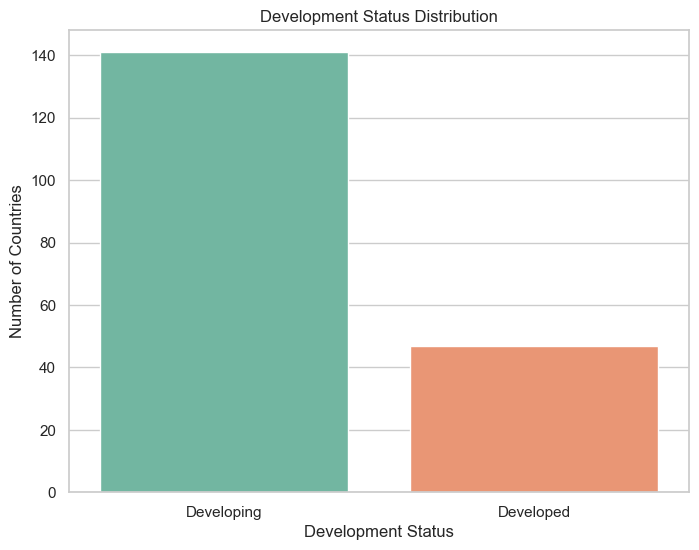


    Insights from Development Status Distribution:
    - The number of Developing countries is significantly higher (Total: 141) compared to Developed countries (Total: 47).
    - The dataset is more skewed towards Developing nations.
    


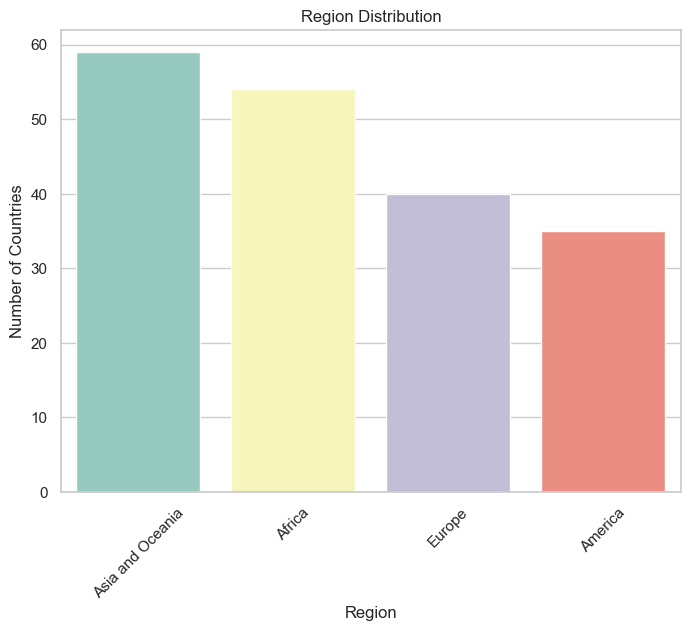


    Insights from Region Distribution:
    - The distribution is relatively even among Asia and Oceania, Africa, and Europe, but Asia and Oceania and Africa have the highest representation.
    - There are fewer countries listed as "Developed" in certain regions (e.g., 'Developed - Asia and Oceania' and 'Developed - America').
    - The 'Developed' regions show fewer countries, indicating potential economic disparities among different regions.
    


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Plot the distribution of countries by development status
def plot_development_status_distribution():
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=merged_df, x='food_development_status', hue='food_development_status', palette='Set2', legend=False)
    plt.title('Development Status Distribution')
    plt.xlabel('Development Status')
    plt.ylabel('Number of Countries')
    plt.show()

    # Writing insights based on the graph
    development_status_counts = merged_df['food_development_status'].value_counts()
    insights = f"""
    Insights from Development Status Distribution:
    - The number of Developing countries is significantly higher (Total: {development_status_counts['Developing']}) compared to Developed countries (Total: {development_status_counts['Developed']}).
    - The dataset is more skewed towards Developing nations.
    """
    return insights


# Plot the distribution of countries by region
def plot_region_distribution():
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(data=merged_df, x='Region_Cleaned', hue='Region_Cleaned', palette='Set3', legend=False)
    plt.title('Region Distribution')
    plt.xlabel('Region')
    plt.ylabel('Number of Countries')
    plt.xticks(rotation=45)
    plt.show()

    # Writing insights based on the graph
    region_counts = merged_df['Region_Cleaned'].value_counts()
    insights = f"""
    Insights from Region Distribution:
    - The distribution is relatively even among Asia and Oceania, Africa, and Europe, but Asia and Oceania and Africa have the highest representation.
    - There are fewer countries listed as "Developed" in certain regions (e.g., 'Developed - Asia and Oceania' and 'Developed - America').
    - The 'Developed' regions show fewer countries, indicating potential economic disparities among different regions.
    """
    return insights


# Call the functions and print insights
development_status_insights = plot_development_status_distribution()
print(development_status_insights)

region_distribution_insights = plot_region_distribution()
print(region_distribution_insights)


In [18]:
print(merged_df.columns.tolist())


['geography_code', 'food_countries', 'food_developing_region_un', 'food_development_status', 'Region_Cleaned']
